In [ ]:
import pandas as pd

df = pd.read_json('test.jsonl', lines=True)

In [4]:
df.head(10)

,id,text,label,label_text
0,en_0199937,"These are AWFUL. They are see through, the fab...",0,0
1,en_0863335,I bought 4 and NONE of them worked. Yes I used...,0,0
2,en_0565010,On first use it didn't heat up and now it does...,0,0
3,en_0963290,You want an HONEST answer? I just returned fro...,0,0
4,en_0238156,The glue works fine but the container is impos...,0,0
5,en_0728007,I was over the moon when I got this. I love su...,0,0
6,en_0363796,"Gotta say, not impressed with the quality. I m...",0,0
7,en_0254608,I would give this zero stars if I could. This ...,0,0
8,en_0066041,Two of the glasses were broken when I opened t...,0,0
9,en_0541277,Doesn’t even work . Did nothing for me :(,0,0


In [2]:
distribution_classes = df['label'].value_counts()

word_frequency = df['text'].str.split(expand=True).stack().value_counts().head(10)

average_length = df['text'].apply(lambda x: len(x.split())).mean()

document_length_distribution = df['text'].apply(lambda x: len(x.split())).value_counts().sort_index()

print("Distribution des classes :\n", distribution_classes)
print("\nFréquence des mots les plus communs :\n", word_frequency)
print("\nLongueur moyenne des documents :", average_length)
print("\nDistribution de la longueur des documents :\n", document_length_distribution)


Distribution des classes :
 0    1000
1    1000
2    1000
3    1000
4    1000
Name: label, dtype: int64

Fréquence des mots les plus communs :
 the    7378
I      5147
and    4434
to     4339
a      3941
it     3431
is     2442
of     2209
for    2191
but    1744
dtype: int64

Longueur moyenne des documents : 33.9262

Distribution de la longueur des documents :
 2        2
3       20
4       94
5      161
6      140
      ... 
292      1
315      1
328      1
329      1
447      1
Name: text, Length: 193, dtype: int64


In [5]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Charger le tokenizer et le modèle
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")


/Users/xinleichen/miniconda3/envs/sklearn/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Préparer les nouvelles données
new_data = df['text'].tolist()

batch_size = 32  # Ajuster selon les besoins
all_predictions = []

for i in range(0, len(new_data), batch_size):
    batch_texts = new_data[i:i+batch_size]
    inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    predictions = torch.argmax(outputs.logits, dim=-1)
    all_predictions.extend(predictions.tolist())

print(all_predictions)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Dans la boucle, déplacer également les données d'entrée sur le GPU
inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True).to(device)
inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)


[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 4, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [7]:
# Ajouter les résultats de prédiction au DataFrame
df['prediction'] = all_predictions

# Enregistrer dans un fichier CSV
df.to_csv('predictions.csv', index=False)

In [8]:
# !pip install seaborn


In [9]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
true_labels = df['label'].tolist() 

precision = precision_score(true_labels, all_predictions, average='weighted')
recall = recall_score(true_labels, all_predictions, average='weighted')
f1 = f1_score(true_labels, all_predictions, average='weighted')


In [11]:
print(precision)
print(recall)
print(f1)

0.5260306513162624
0.5414
0.5073242734333704


Text(0.5, 1.0, 'Matrice de confusion')

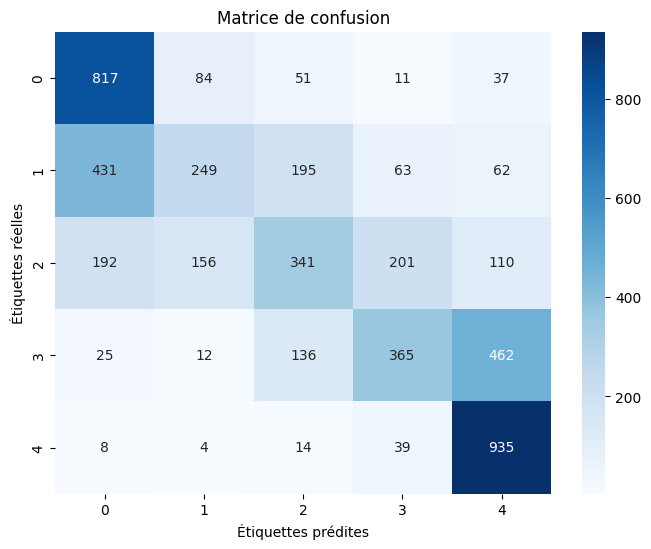

In [12]:
# Calculer la matrice de confusion
cm = confusion_matrix(true_labels, all_predictions)

# Créer une fenêtre graphique
plt.figure(figsize=(8, 6))

# Utiliser Seaborn pour dessiner une carte thermique
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Ajouter les étiquettes des axes et le titre
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de confusion')